<a href="https://colab.research.google.com/github/badriadhikari/2019-Spring-DL/blob/master/module4_dl_best_practices/PimaIndians_Classification_with_Callbacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Early Stopping and Model Checkpointing - Pima Indians Diabetes Classification with Callbacks


In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
np.random.seed(7)

print('')
print('Load pima indians dataset..')
dataset = np.loadtxt("https://raw.githubusercontent.com/badriadhikari/2019-Spring-DL/master/course_content/module1_intro2ML/pima-indians-diabetes.csv", delimiter=",")
print(dataset.shape)

print('')
print('Preview first 5 rows and all columns..')
np.set_printoptions(precision = 4, suppress = True)
print(dataset[0:5, :])

print('')
print('Split the data (768 rows) into Training Set (first 700 rows) and Validation Set (remaining 68 rows)..')
XTRAIN = dataset[:700,0:8]
YTRAIN = dataset[:700,8]
XVALIDATION = dataset[700:,0:8]
YVALIDATION = dataset[700:,8]

print('')
print('Review the dimensions of our Training Dataset and Validation Dataset..')
print(XTRAIN.shape)
print(YTRAIN.shape)
print(XVALIDATION.shape)
print(YVALIDATION.shape)

print(XTRAIN[0:3,])
print(YTRAIN[0:3])
print(XVALIDATION[0:3,])
print(YVALIDATION[0:3])

print('')
print('Create a neural network model..')
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print('')
print('Tran..')
# Start with epochs = 128
history = model.fit(XTRAIN, YTRAIN, epochs=1024, batch_size=10, verbose = 0, validation_data = (XVALIDATION, YVALIDATION))

Using TensorFlow backend.



Load pima indians dataset..
(768, 9)

Preview first 5 rows and all columns..
[[  6.    148.     72.     35.      0.     33.6     0.627  50.      1.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.      0.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.      1.   ]
 [  1.     89.     66.     23.     94.     28.1     0.167  21.      0.   ]
 [  0.    137.     40.     35.    168.     43.1     2.288  33.      1.   ]]

Split the data (768 rows) into Training Set (first 700 rows) and Validation Set (remaining 68 rows)..

Review the dimensions of our Training Dataset and Validation Dataset..
(700, 8)
(700,)
(68, 8)
(68,)
[[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.   ]]
[1. 0. 1.]
[[  2.    122.     76.     27.    200.     35.9     0.483  26.   ]
 [  6.    125.     78.     31.      0.     27.6     0.565  49

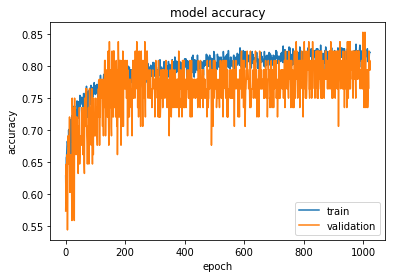

In [2]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [3]:
scores = model.evaluate(XVALIDATION, YVALIDATION)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

68/68 [==============================] - 0s 98us/step

acc: 79.41%


----------

In [0]:
import keras

a = keras.callbacks.ModelCheckpoint( filepath='my_model.h5', monitor='val_acc', save_best_only=True )
b = keras.callbacks.EarlyStopping( monitor = 'val_acc', patience = 100 )

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Observe by setting verbose = 1
history = model.fit(XTRAIN, YTRAIN, epochs=1024, batch_size=10, callbacks = [a, b], verbose = 0, validation_data = (XVALIDATION, YVALIDATION))

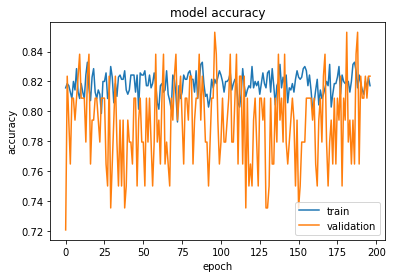

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [6]:
scores = model.evaluate(XVALIDATION, YVALIDATION)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

68/68 [==============================] - 0s 73us/step

acc: 82.35%


------------

In [0]:
from keras.models import load_model
model = load_model('my_model.h5')

In [8]:
scores = model.evaluate(XVALIDATION, YVALIDATION)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

68/68 [==============================] - 0s 1ms/step

acc: 85.29%


In [0]:
from google.colab import files
files.download("my_model.h5")